# ___

# [ Machine Learning in Geosciences ]


---

Lecturer: *Lukas Brodsky lukas.brodsky@natur.cuni.cz*

**Department of Applied Geoinformatics and Carthography, Charles University** 

___

## Exercise using GeoPandas & Rasterio

Task: develop simple workflow using Geopandas and Rasterio packages. The goal is to develop ML model to classify three classes: glacier, debris-coverd glacier and non-glacieted (mostly bare) land using Landsat image. 

Intups:

    * Landsat images (multispectral) 
    * Polygons representing the above-mentioned three classes
    
Output: 

    * Classification map 
    * Accuracy scores (both!). 

## Rasterizing poylgons

In [1]:
import os 
import geopandas as gpd 
import rasterio as rio
from rasterio import features
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
# Vector data 
path = './GeoPython'
filename = 'polygons.shp'
path_fn_vec = os.path.join(path, filename)
gdf = gpd.read_file(path_fn_vec)

In [5]:
# # Raster data 
raster_filename = 'landsat.tif' 
path_fn_ras = os.path.join(path, raster_filename)
ds = rio.open(path_fn_ras)

In [8]:
# out filename 
out_fn_ras = os.path.join(path, 'rasterized_poly_2.tif')

In [9]:
# write the raster 
meta = ds.meta
with rio.open(out_fn_ras, 'w+', **meta) as out:
    out_arr = out.read(1)

    # this is where we create a generator of geom, value pairs to use in rasterizing
    shapes = ((geom, value) for geom, value in zip(gdf.geometry, gdf.label))

    burned = features.rasterize(shapes=shapes, fill=0, out=out_arr, transform=out.transform)
    out.write_band(1, burned)

In [10]:
# Check the rasterization! 
rio_ds = rio.open(out_fn_ras)
rio_arr = rio_ds.read(1)
rio_arr.shape

(500, 500)

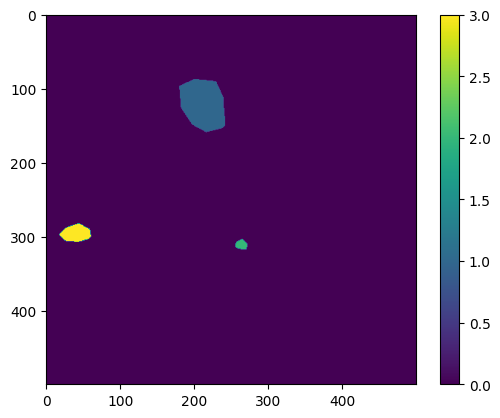

In [55]:
plt.imshow(rio_arr)
plt.colorbar()

In [6]:
image_arr = np.dstack([ds.read(b) for b in ds.indexes])

In [7]:
image_arr.shape

(500, 500, 6)

In [47]:
# my data for Machine Learning 
X = image_arr[rio_arr > 0, :] 
y = rio_arr[rio_arr > 0]

# X = image_arr[rio_arr >= 0, :] 
# y = rio_arr[:]

In [48]:
X.shape

(4370, 6)

In [49]:
y.shape

(4370,)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [50]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [51]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
class_predictions = rf_model.predict(X_train)
train_acc = accuracy_score(y_train, class_predictions)
print(f"Random forest classifier train accuracy {train_acc * 100} %")

Random forest classifier train accuracy 100.0 %


In [53]:
test_predictions = rf_model.predict(X_test)
test_acc = accuracy_score(y_test, test_predictions)
print(f"Random forest classifier test accuracy {test_acc * 100} %")

Random forest classifier test accuracy 100.0 %


In [54]:
class_predictions.shape

(2185,)

In [22]:
class_predictions

array([1, 1, 1, ..., 1, 3, 1], dtype=int16)

In [59]:
image_array_class = class_predictions.reshape(image_arr.shape[0], image_arr.shape[1])

ValueError: cannot reshape array of size 2185 into shape (500,500)

In [60]:
image_array_class = class_predictions.reshape(image_arr.shape[:,:,0])

TypeError: tuple indices must be integers or slices, not tuple

In [57]:
image_arr.shape[:,:,0]

TypeError: tuple indices must be integers or slices, not tuple

TypeError: Invalid shape (2185,) for image data

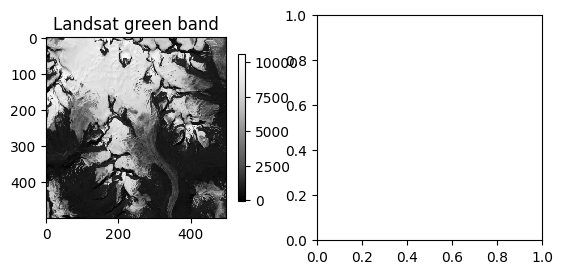

In [20]:
# Show the classification map (any colours) 
plt.subplot(121)
plt.imshow(image_arr[:, :, 1], cmap=plt.cm.Greys_r, interpolation='none')
plt.colorbar(shrink=0.4)
plt.title('Landsat green band')
plt.subplot(122)
plt.imshow(class_predictions, cmap=plt.cm.Spectral, interpolation='none')
plt.title('Classification')
#  ['ice', 'debris', 'bare']
plt.colorbar(cmap=plt.cm.Spectral, ticks=np.unique(y), format='%1i', shrink=0.4)
plt.tight_layout()

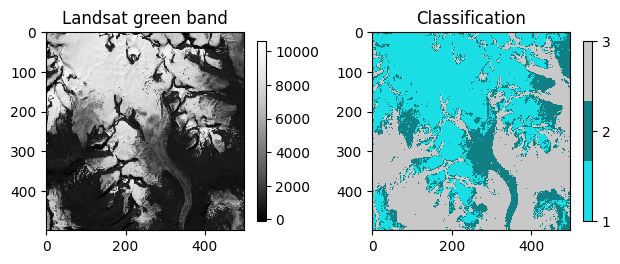

In [76]:
# Show the classification map (any colours) 
plt.subplot(121)
plt.imshow(image_arr[:, :, 1], cmap=plt.cm.Greys_r, interpolation='none')
plt.colorbar(shrink=0.4)
plt.title('Landsat green band')
plt.subplot(122)
plt.imshow(class_prediction, cmap=cmap, interpolation='none')
plt.title('Classification')
#  ['ice', 'debris', 'bare']
plt.colorbar(cmap=cmap, ticks=np.unique(y), format='%1i', shrink=0.4)
plt.tight_layout()